# Pokémon Stats EDA
This notebook performs exploratory data analysis on the cleaned Pokémon dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/clean/pokemon_clean.csv')
df.head()

,id,name,type1,type2,height,weight,hp,attack,defense,special_attack,special_defense,speed,total_stats,is_legendary
0,1,Bulbasaur,grass,poison,7,69,45,49,49,65,65,45,318,False
1,2,Ivysaur,grass,poison,10,130,60,62,63,80,80,60,405,False
2,3,Venusaur,grass,poison,20,1000,80,82,83,100,100,80,525,False
3,4,Charmander,fire,NaN,6,85,39,52,43,60,50,65,309,False
4,5,Charmeleon,fire,NaN,11,190,58,64,58,80,65,80,405,False


## Summary Statistics

In [3]:
df.describe()

,id,height,weight,hp,attack,defense,special_attack,special_defense,speed,total_stats
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000
mean,512.987305,12.111328,667.980469,70.169922,77.465820,72.451172,70.090820,70.196289,67.227539,427.601562
std,296.180691,12.486838,1211.820632,26.640036,29.742801,29.246042,29.671195,26.650586,28.700939,112.792777
min,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,256.750000,5.000000,85.000000,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000,324.500000
50%,512.500000,10.000000,280.000000,68.000000,75.000000,70.000000,65.000000,66.500000,65.000000,450.000000
75%,769.250000,15.000000,700.000000,85.000000,100.000000,90.000000,90.000000,86.000000,88.250000,508.000000
max,1025.000000,200.000000,9999.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000


## Distribution of Total Stats

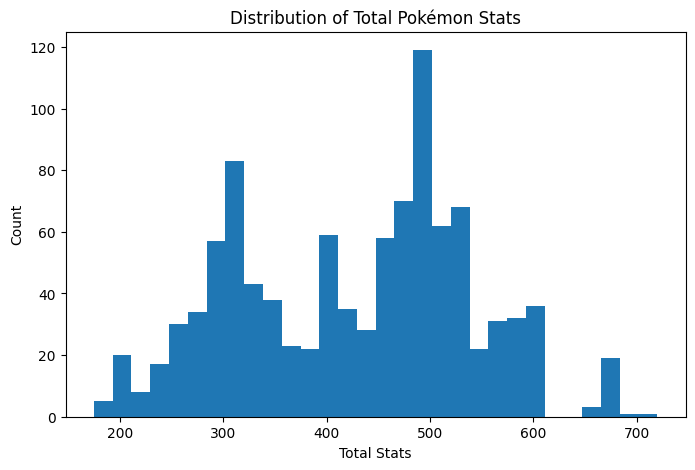

In [4]:
plt.figure(figsize=(8,5))
plt.hist(df['total_stats'], bins=30)
plt.xlabel("Total Stats")
plt.ylabel("Count")
plt.title("Distribution of Total Pokémon Stats")
plt.show()

## Average Stats by Primary Type

In [5]:
type_means = df.groupby('type1')[['hp','attack','defense','special_attack','special_defense','speed','total_stats']].mean()
type_means

,hp,attack,defense,special_attack,special_defense,speed,total_stats
type1,,,,,,,
bug,56.493976,67.554217,69.578313,56.433735,63.313253,61.265060,374.638554
dark,75.800000,88.000000,71.622222,72.933333,70.755556,75.622222,454.733333
dragon,79.594595,98.972973,75.216216,78.486486,77.702703,80.189189,490.162162
electric,64.779661,72.966102,62.101695,84.830508,66.559322,85.067797,436.305085
fairy,71.379310,66.827586,70.965517,76.103448,85.793103,65.000000,436.068966
fighting,76.075000,102.700000,72.350000,53.175000,67.275000,69.975000,441.550000
fire,69.833333,82.606061,66.833333,83.272727,69.545455,74.106061,446.196970
flying,70.000000,79.888889,66.000000,68.444444,68.777778,83.000000,436.111111
ghost,61.800000,68.600000,75.485714,84.114286,80.828571,60.342857,431.171429


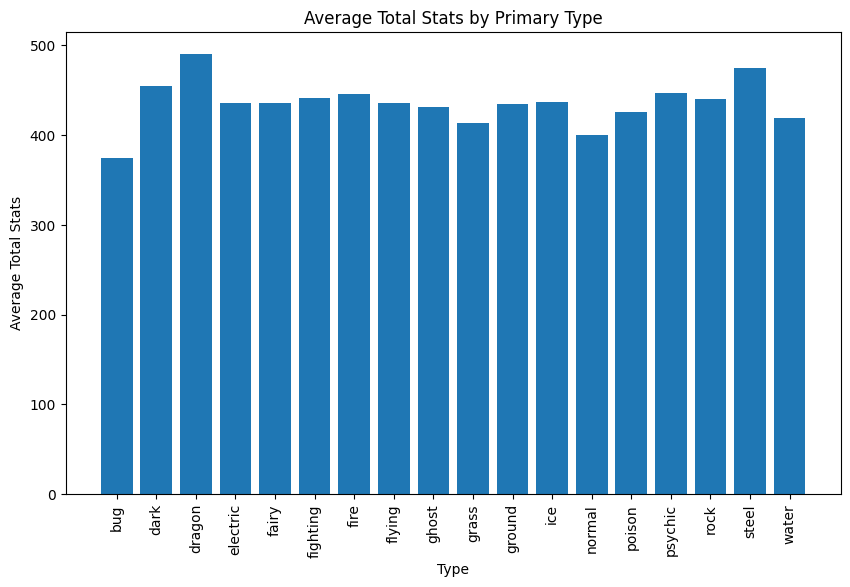

In [6]:
plt.figure(figsize=(10,6))
plt.bar(type_means.index, type_means['total_stats'])
plt.xticks(rotation=90)
plt.xlabel("Type")
plt.ylabel("Average Total Stats")
plt.title("Average Total Stats by Primary Type")
plt.show()

## Correlation Heatmap

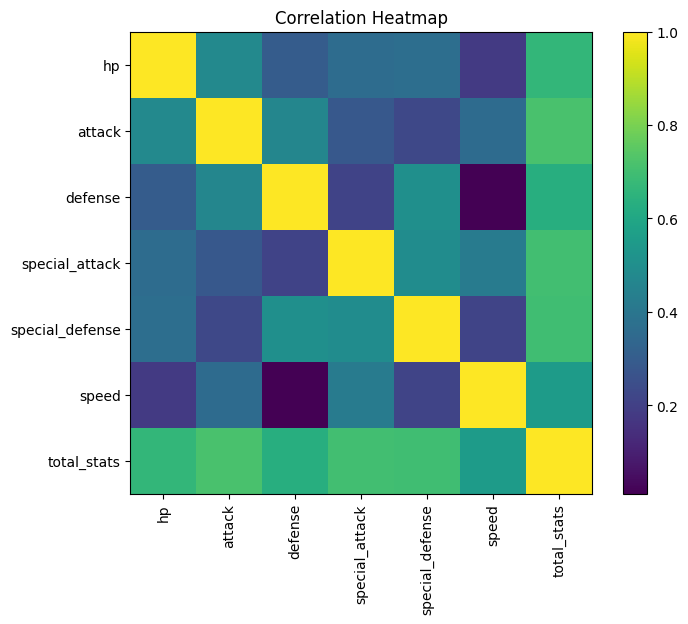

In [7]:
import numpy as np

plt.figure(figsize=(8,6))
corr = df[['hp','attack','defense','special_attack','special_defense','speed','total_stats']].corr()
plt.imshow(corr, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

## Legendary vs Non-Legendary Comparison

In [8]:
legendary_means = df.groupby('is_legendary')['total_stats'].mean()
legendary_means

is_legendary
False    410.989247
True     591.957447
Name: total_stats, dtype: float64

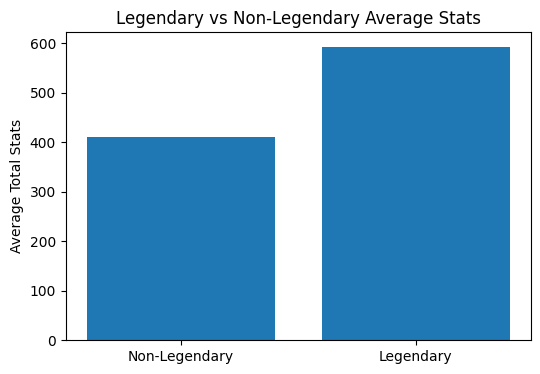

In [9]:
plt.figure(figsize=(6,4))
plt.bar(['Non-Legendary','Legendary'], legendary_means)
plt.ylabel("Average Total Stats")
plt.title("Legendary vs Non-Legendary Average Stats")
plt.show()